# **Import necessary packages and dataset from google drive**

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Initialize Dataset**

In [259]:
letreg_df = pd.DataFrame(pd.read_csv('/content/drive/MyDrive/Datasets2/maternal.csv'))
letreg_df.head()
letreg_df.info()
letreg_df.shape
letreg_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB


,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775,0.867850
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702,0.807353
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000,0.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000,0.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000,1.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000,2.000000


# **Duplicate the dataset, as a safety, and remove null values**

In [260]:
letreg_dup = letreg_df.copy()
letreg_dup.info()
letreg_dup.head()
letreg_dup.shape
letreg_dup.describe()

#Dataset size
initial_rows, initial_cols = letreg_dup.shape

print("Percentage of Null Values of dataset Features:")
round(100*(letreg_dup.isnull().sum()/len(letreg_dup)), 2).sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 55.6 KB
Percentage of Null Values of dataset Features:


Age            0.0
SystolicBP     0.0
DiastolicBP    0.0
BS             0.0
BodyTemp       0.0
HeartRate      0.0
RiskLevel      0.0
dtype: float64

# **Remove duplicates and view updated dataset**

In [261]:
letreg_dup.drop_duplicates(subset = None, inplace = True)
print(letreg_dup.shape)
print(letreg_df.shape)

updated_rows, updated_cols = letreg_dup.shape
print("\nDataset Information After Cleaning:")
print(letreg_dup.info())

# Display summary statistics of the dataset after cleaning
print("\nSummary Statistics After Cleaning:")
print(letreg_dup.describe())

# Summary of cleaning process
print("\nCleaning Summary:")
print(f"Initial Dataset Size: {initial_rows} rows, {initial_cols} columns")
print(f"Updated Dataset Size: {updated_rows} rows, {updated_cols} columns")
print(f"Rows Removed: {initial_rows - updated_rows}")
print(f"Columns Removed: {initial_cols - updated_cols}")

(452, 7)
(1014, 7)

Dataset Information After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 452 entries, 0 to 705
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          452 non-null    int64  
 1   SystolicBP   452 non-null    int64  
 2   DiastolicBP  452 non-null    int64  
 3   BS           452 non-null    float64
 4   BodyTemp     452 non-null    float64
 5   HeartRate    452 non-null    int64  
 6   RiskLevel    452 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 28.2 KB
None

Summary Statistics After Cleaning:
              Age  SystolicBP  DiastolicBP          BS    BodyTemp  \
count  452.000000  452.000000   452.000000  452.000000  452.000000   
mean    29.194690  110.553097    75.418142    8.346173   98.692478   
std     13.767379   17.872282    13.754578    2.829209    1.410897   
min     10.000000   70.000000    49.000000    6.000000   98.000000   
25%     19.000000   90.00

# **Models to use**

In [262]:
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "SGD Classifier": SGDClassifier(random_state=42)
}

# **Models with all features**

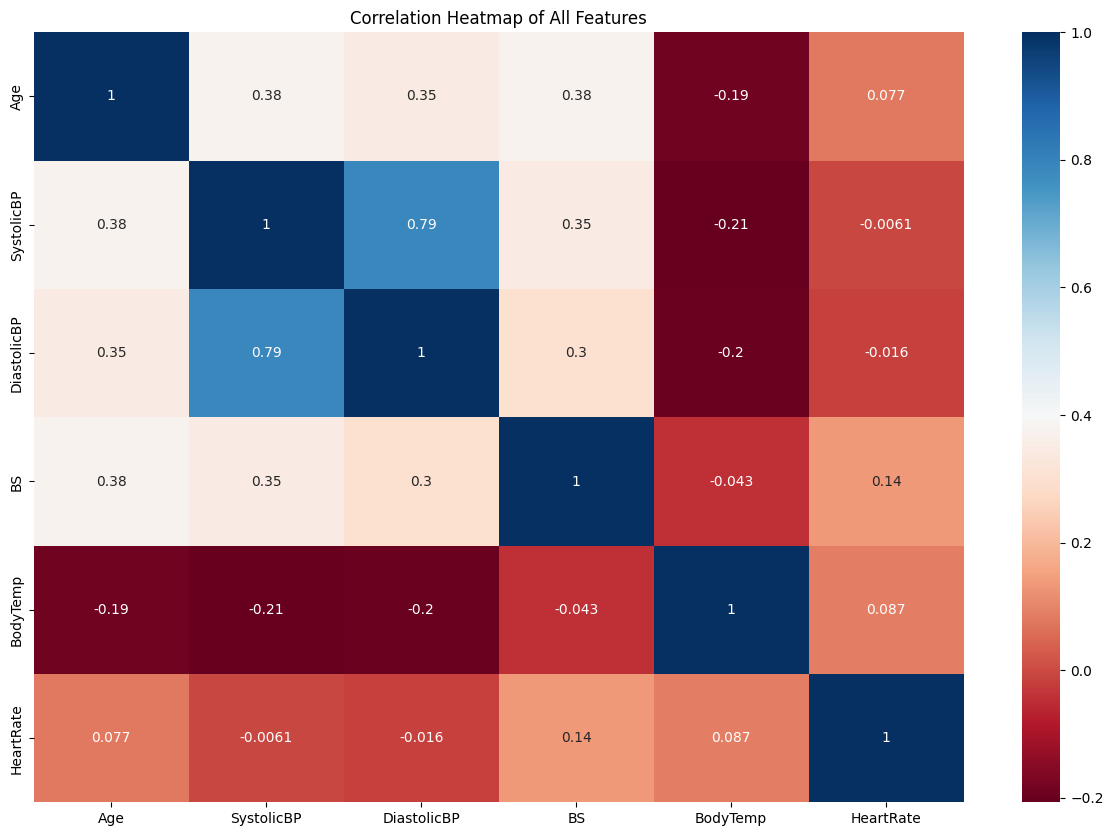

Scores with all features and without any added techniques:
Naive Bayes: 63.74%
Decision Tree: 68.13%
Random Forest: 64.84%
Support Vector Machine: 61.54%
SGD Classifier: 57.14%


In [263]:
X = letreg_dup[['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']]
y = letreg_dup['RiskLevel']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot correlation heatmap for all features
plt.figure(figsize=(15, 10))
sns.heatmap(X.corr(), annot = True, cmap="RdBu")
plt.title('Correlation Heatmap of All Features')
plt.show()

# Train and evaluate models with all features
results_all_features = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    results_all_features[name] = accuracy

# Print scores before RFE
print("Scores with all features and without any added techniques:")
for name, accuracy in results_all_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# **Models with selected features**

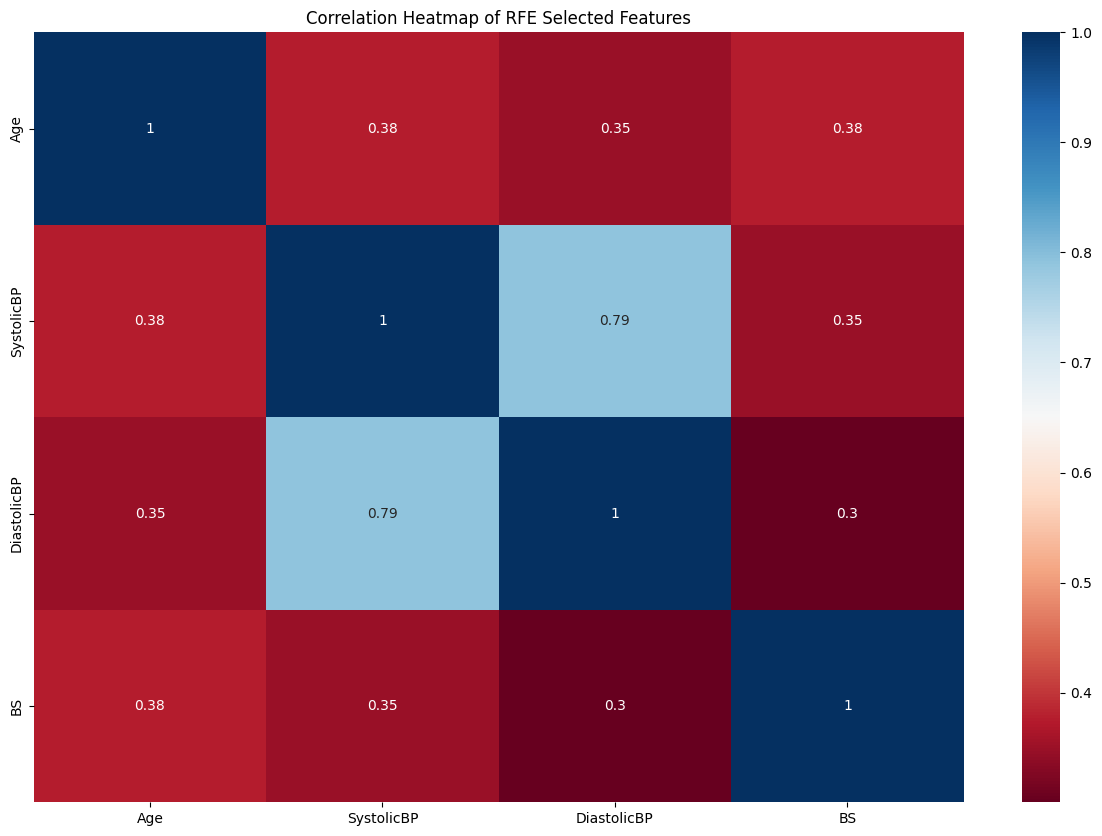

Scores with selected features and without any added techniques:
Naive Bayes: 64.84%
Decision Tree: 62.64%
Random Forest: 67.03%
Support Vector Machine: 60.44%
SGD Classifier: 28.57%


In [264]:
X_selected = letreg_dup[['Age', 'SystolicBP', 'DiastolicBP', 'BS']]
y_selected = letreg_dup['RiskLevel']
# Split the data into training and testing sets
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(X_selected, y_selected, test_size=0.2, random_state=42)

# Plot correlation heatmap for selected features
plt.figure(figsize=(15, 10))
sns.heatmap(X_selected.corr(), annot=True, cmap='RdBu')
plt.title('Correlation Heatmap of RFE Selected Features')
plt.show()

# Train and evaluate models with all features
results_selected_features = {}
for name, model in models.items():
    model.fit(X_train_st, y_train_st)
    predictions = model.predict(X_test_st)
    accuracy = accuracy_score(y_test_st, predictions)
    results_selected_features[name] = accuracy

# Print scores before RFE
print("Scores with selected features and without any added techniques:")
for name, accuracy in results_selected_features.items():
    print(f"{name}: {accuracy*100:.2f}%")

# **Plot the accuracy results (All Features vs Selected Features)**

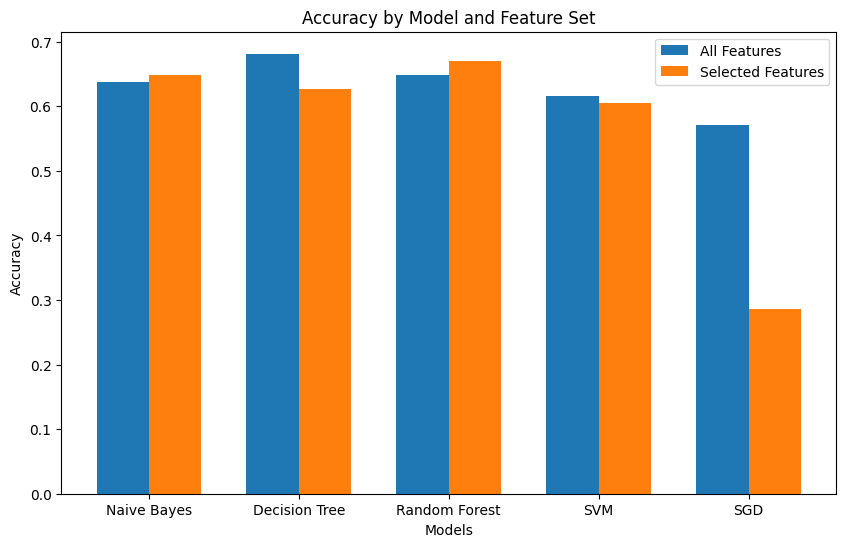

In [265]:
# Plot the accuracy scores
data = {
    'Naive Bayes': {'All Features': [list(results_all_features.values())[0]], 'Selected Features': [list(results_selected_features.values())[0]]},
    'Decision Tree': {'All Features': [list(results_all_features.values())[1]], 'Selected Features': [list(results_selected_features.values())[1]]},
    'Random Forest': {'All Features' :[list(results_all_features.values())[2]], 'Selected Features': [list(results_selected_features.values())[2]]},
    'SVM': {'All Features': [list(results_all_features.values())[3]], 'Selected Features': [list(results_selected_features.values())[3]]},
    'SGD': {'All Features': [list(results_all_features.values())[4]], 'Selected Features': [list(results_selected_features.values())[4]]}
}

models1 = list(data.keys())
all_features_accuracy = [data[model]['All Features'][0] for model in models1]
selected_features_accuracy = [data[model]['Selected Features'][0] for model in models1]

x = np.arange(len(models1))

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

rects1 = ax.bar(x - width/2, all_features_accuracy, width, label='All Features')
rects2 = ax.bar(x + width/2, selected_features_accuracy, width, label='Selected Features')

ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Model and Feature Set')
ax.set_xticks(x)
ax.set_xticklabels(models1)
ax.legend()

plt.show()

# **All features and Selected features listed**

In [266]:
print("All Featuers:")
print(X.shape)
print(X)

print("\nSelected Features:")
print(X_selected.shape)
print(X_selected)

All Featuers:
(452, 6)
     Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0     25         130           80  15.0      98.0         86
1     35         140           90  13.0      98.0         70
2     29          90           70   8.0     100.0         80
3     30         140           85   7.0      98.0         70
4     35         120           60   6.1      98.0         76
..   ...         ...          ...   ...       ...        ...
673   12         100           50   6.4      98.0         70
674   15         100           60   6.0      98.0         80
703   15         100           49   7.6      98.0         77
704   12         100           50   6.0      98.0         70
705   21         100           50   6.8      98.0         60

[452 rows x 6 columns]

Selected Features:
(452, 4)
     Age  SystolicBP  DiastolicBP    BS
0     25         130           80  15.0
1     35         140           90  13.0
2     29          90           70   8.0
3     30         140           8

# **Decide highest model to use**

In [267]:
from sklearn.metrics import precision_score, recall_score, f1_score
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]
print(highest_model)

DecisionTreeClassifier(random_state=42)


# **Ensemble using best-performing model by stacking, adaboost, and bagging on all features**

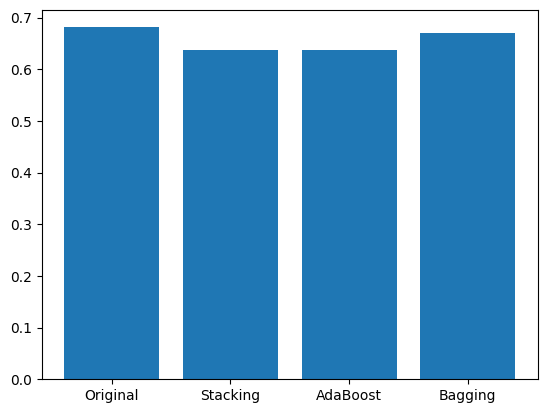

Summary of Model Accuracies:
Original: 0.6813
Stacking: 0.6374
AdaBoost: 0.6374
Bagging: 0.6703
Precision: 0.6627144785039522
Recall: 0.6813186813186813
F1 Score: 0.663735585681287
Precision: 0.7481437481437482
Recall: 0.6373626373626373
F1 Score: 0.5449503952177749
Precision: 0.6118647458983593
Recall: 0.6373626373626373
F1 Score: 0.6124594271192838
Precision: 0.6468203927220321
Recall: 0.6703296703296703
F1 Score: 0.641334482510953
Original:
  Precision: 0.6627144785039522
  Recall: 0.6813186813186813
  F1: 0.663735585681287
Stacking:
  Precision: 0.7481437481437482
  Recall: 0.6373626373626373
  F1: 0.5449503952177749
AdaBoost:
  Precision: 0.6118647458983593
  Recall: 0.6373626373626373
  F1: 0.6124594271192838
Bagging:
  Precision: 0.6468203927220321
  Recall: 0.6703296703296703
  F1: 0.641334482510953



In [268]:
# Train and evaluate the highest performing model with all features
model_o = highest_model.fit(X_train, y_train)
predictions_highest = highest_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=RandomForestClassifier())
model_s = stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators = 500)
model_a = adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators = 500)
model_b = bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

data = {
    'Original': accuracy_highest, 'Stacking': stacking_accuracy, 'AdaBoost': adaboost_accuracy, 'Bagging': bagging_accuracy
}
data_one = data
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

# Assuming y_true are true labels and y_pred are predicted labels
# Compute precision
y_pred = model_o.predict(X_test)
precision11 = precision_score(y_test, y_pred, average='weighted')
recall11 = recall_score(y_test, y_pred, average='weighted')
f111 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision11)
print("Recall:", recall11)
print("F1 Score:", f111)
y_pred = model_s.predict(X_test)
precision12 = precision_score(y_test, y_pred, average='weighted')
recall12 = recall_score(y_test, y_pred, average='weighted')
f112 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision12)
print("Recall:", recall12)
print("F1 Score:", f112)
y_pred = model_a.predict(X_test)
precision13 = precision_score(y_test, y_pred, average='weighted')
recall13 = recall_score(y_test, y_pred, average='weighted')
f113 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision13)
print("Recall:", recall13)
print("F1 Score:", f113)
y_pred = model_b.predict(X_test)
precision14 = precision_score(y_test, y_pred, average='weighted')
recall14 = recall_score(y_test, y_pred, average='weighted')
f114 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision14)
print("Recall:", recall14)
print("F1 Score:", f114)

metr1 = {
    'Original': {
        'Precision': precision11,
        'Recall': recall11,
        'F1': f111
    },
    'Stacking': {
        'Precision': precision12,
        'Recall': recall12,
        'F1': f112
    },
    'AdaBoost': {
        'Precision': precision13,
        'Recall': recall13,
        'F1': f113
    },
    'Bagging': {
        'Precision': precision14,
        'Recall': recall14,
        'F1': f114
    }
}
for line, metrics in metr1.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character

# **Ensemble using best-performing model by stacking, adaboost, and bagging on selected features**

DecisionTreeClassifier(random_state=42)


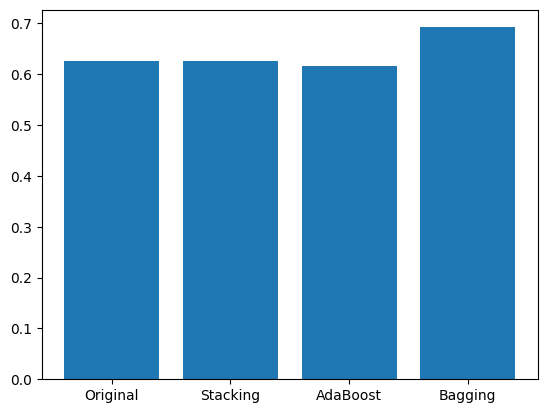

Summary of Model Accuracies:
Original: 0.6264
Stacking: 0.6264
AdaBoost: 0.6154
Bagging: 0.6923
Precision: 0.6041033041033042
Recall: 0.6263736263736264
F1 Score: 0.6045460697235632
Precision: 0.4468591110382155
Recall: 0.6263736263736264
F1 Score: 0.5214960478118372
Precision: 0.590501532010966
Recall: 0.6153846153846154
F1 Score: 0.5981155686418844
Precision: 0.6750771158665896
Recall: 0.6923076923076923
F1 Score: 0.6725335104455985
Original:
  Precision: 0.6041033041033042
  Recall: 0.6263736263736264
  F1: 0.6045460697235632
Stacking:
  Precision: 0.4468591110382155
  Recall: 0.6263736263736264
  F1: 0.5214960478118372
AdaBoost:
  Precision: 0.590501532010966
  Recall: 0.6153846153846154
  F1: 0.5981155686418844
Bagging:
  Precision: 0.6750771158665896
  Recall: 0.6923076923076923
  F1: 0.6725335104455985



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [269]:
highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]
print(highest_model)

# Train and evaluate the highest performing model with selected features
model_o = highest_model.fit(X_train_st, y_train_st)
predictions_highest = highest_model.predict(X_test_st)
accuracy_highest = accuracy_score(y_test_st, predictions_highest)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=RandomForestClassifier())
model_s = stacking_model.fit(X_train_st, y_train_st)
stacking_accuracy = stacking_model.score(X_test_st, y_test_st)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators = 500)
model_a = adaboost_model.fit(X_train_st, y_train_st)
adaboost_accuracy = adaboost_model.score(X_test_st, y_test_st)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators = 500)
model_b = bagging_model.fit(X_train_st, y_train_st)
bagging_accuracy = bagging_model.score(X_test_st, y_test_st)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}

data = {
    'Original': accuracy_highest, 'Stacking': stacking_accuracy, 'AdaBoost': adaboost_accuracy, 'Bagging': bagging_accuracy
}
data_two = data
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy:.4f}")

# Assuming y_true are true labels and y_pred are predicted labels
# Compute precision
y_pred = model_o.predict(X_test_st)
precision21 = precision_score(y_test_st, y_pred, average='weighted')
recall21 = recall_score(y_test_st, y_pred, average='weighted')
f121 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision21)
print("Recall:", recall21)
print("F1 Score:", f121)
y_pred = model_s.predict(X_test_st)
precision22 = precision_score(y_test_st, y_pred, average='weighted')
recall22 = recall_score(y_test_st, y_pred, average='weighted')
f122 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision22)
print("Recall:", recall22)
print("F1 Score:", f122)
y_pred = model_a.predict(X_test_st)
precision23 = precision_score(y_test_st, y_pred, average='weighted')
recall23 = recall_score(y_test_st, y_pred, average='weighted')
f123 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision23)
print("Recall:", recall23)
print("F1 Score:", f123)
y_pred = model_b.predict(X_test_st)
precision24 = precision_score(y_test_st, y_pred, average='weighted')
recall24 = recall_score(y_test_st, y_pred, average='weighted')
f124 = f1_score(y_test_st, y_pred, average='weighted')
print("Precision:", precision24)
print("Recall:", recall24)
print("F1 Score:", f124)

metr2 = {
    'Original': {
        'Precision': precision21,
        'Recall': recall21,
        'F1': f121
    },
    'Stacking': {
        'Precision': precision22,
        'Recall': recall22,
        'F1': f122
    },
    'AdaBoost': {
        'Precision': precision23,
        'Recall': recall23,
        'F1': f123
    },
    'Bagging': {
        'Precision': precision24,
        'Recall': recall24,
        'F1': f124
    }
}
for line, metrics in metr2.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character

# **Ensemble using best-performing model by stacking, adaboost, and bagging on no multicollinearity and outliers. FINAL MODEL**

['Age', 'SystolicBP', 'DiastolicBP', 'BS']
Dropping SystolicBP with VIF=93.04814192474493
Dropping DiastolicBP with VIF=31.850067581410347
Remaining variables: Index(['Age', 'BS'], dtype='object')
DecisionTreeClassifier(random_state=42)


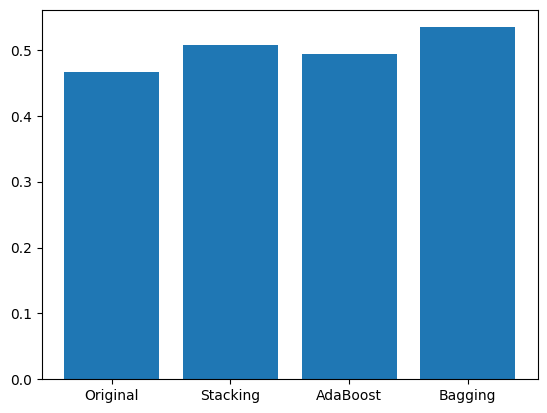

Summary of Model Accuracies:
Original: 46.58%
Stacking: 50.68%
AdaBoost: 49.32%
Bagging: 53.42%
Precision: 0.4301696020874103
Recall: 0.4657534246575342
F1 Score: 0.4413098197063566
Precision: 0.330404660683357
Recall: 0.5068493150684932
F1 Score: 0.39633607853607444
Precision: 0.4516087926091112
Recall: 0.4931506849315068
F1 Score: 0.4635142844873596
Precision: 0.5024701326071188
Recall: 0.5342465753424658
F1 Score: 0.4964206356789812
Original:
  Precision: 0.4301696020874103
  Recall: 0.4657534246575342
  F1: 0.4413098197063566
Stacking:
  Precision: 0.330404660683357
  Recall: 0.5068493150684932
  F1: 0.39633607853607444
AdaBoost:
  Precision: 0.4516087926091112
  Recall: 0.4931506849315068
  F1: 0.4635142844873596
Bagging:
  Precision: 0.5024701326071188
  Recall: 0.5342465753424658
  F1: 0.4964206356789812



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [270]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = letreg_dup[['Age', 'SystolicBP', 'DiastolicBP', 'BS']]
y = letreg_dup['RiskLevel']

print(list(X.columns))
feature_names = list(X.columns)

df = pd.DataFrame(X, columns=feature_names)
df['RiskLevel'] = y  # Add target column to the DataFrame
# Remove outliers
Q1 = df.drop(columns=['RiskLevel']).quantile(0.25)
Q3 = df.drop(columns=['RiskLevel']).quantile(0.75)
IQR = Q3 - Q1
df_no_outliers = df[~((df.drop(columns=['RiskLevel']) < (Q1 - 1.5 * IQR)) | (df.drop(columns=['RiskLevel']) > (Q3 + 1.5 * IQR))).any(axis=1)]

# Remove multicollinearity using VIF
def calculate_vif(X, thresh=7.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in range(X.iloc[:, variables].shape[1])]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping {X.iloc[:, variables].columns[maxloc]} with VIF={max_vif}")
            del variables[maxloc]
            dropped = True
    print(f'Remaining variables: {X.columns[variables]}')
    return X.iloc[:, variables]

X_no_multicollinearity = calculate_vif(df_no_outliers.drop(columns=['RiskLevel']))

# Update RiskLevel labels after removing outliers and multicollinearity
y_no_outliers_multicollinearity = df_no_outliers['RiskLevel']
X_no_outliers_multicollinearity = df_no_outliers.drop(columns=['RiskLevel'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers_multicollinearity, y_no_outliers_multicollinearity, test_size=0.2, random_state=42)

threshold = 0.5

highest_model_name = max(results_all_features, key=results_all_features.get)
highest_model = models[highest_model_name]
print(highest_model)


# Train and evaluate the highest performing model with RFE-selected features
model_o = highest_model.fit(X_train, y_train)
predictions_highest = highest_model.predict(X_test)
accuracy_highest = accuracy_score(y_test, predictions_highest)

# Apply ensemble techniques to the highest performing model
# Stacking Classifier
stacking_model = StackingClassifier(estimators=[('highest_model', highest_model)], final_estimator=RandomForestClassifier())
model_s = stacking_model.fit(X_train, y_train)
stacking_accuracy = stacking_model.score(X_test, y_test)

# AdaBoost Classifier
adaboost_model = AdaBoostClassifier(estimator=highest_model, n_estimators = 500)
model_a = adaboost_model.fit(X_train, y_train)
adaboost_accuracy = adaboost_model.score(X_test, y_test)

# Bagging Classifier
bagging_model = BaggingClassifier(estimator=highest_model, n_estimators = 500)
model_b = bagging_model.fit(X_train, y_train)
bagging_accuracy = bagging_model.score(X_test, y_test)

# Plotting
models_accuracy = {
    "Original": accuracy_highest,
    "Stacking": stacking_accuracy,
    "AdaBoost": adaboost_accuracy,
    "Bagging": bagging_accuracy
}
data = {
    'Original': accuracy_highest, 'Stacking': stacking_accuracy, 'AdaBoost': adaboost_accuracy, 'Bagging': bagging_accuracy
}
data_three = data
types = list(data.keys())
values = list(data.values())
plt.bar(types, values)
plt.show()

# Print summary of all scores
print("Summary of Model Accuracies:")
for model, accuracy in models_accuracy.items():
    print(f"{model}: {accuracy*100:.2f}%")

# Assuming y_true are true labels and y_pred are predicted labels
# Compute precision
y_pred = model_o.predict(X_test)
precision31 = precision_score(y_test, y_pred, average='weighted')
recall31 = recall_score(y_test, y_pred, average='weighted')
f131 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision31)
print("Recall:", recall31)
print("F1 Score:", f131)
y_pred = model_s.predict(X_test)
precision32 = precision_score(y_test, y_pred, average='weighted')
recall32 = recall_score(y_test, y_pred, average='weighted')
f132 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision32)
print("Recall:", recall32)
print("F1 Score:", f132)
y_pred = model_a.predict(X_test)
precision33 = precision_score(y_test, y_pred, average='weighted')
recall33 = recall_score(y_test, y_pred, average='weighted')
f133 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision33)
print("Recall:", recall33)
print("F1 Score:", f133)
y_pred = model_b.predict(X_test)
precision34 = precision_score(y_test, y_pred, average='weighted')
recall34 = recall_score(y_test, y_pred, average='weighted')
f134 = f1_score(y_test, y_pred, average='weighted')
print("Precision:", precision34)
print("Recall:", recall34)
print("F1 Score:", f134)

metr3 = {
    'Original': {
        'Precision': precision31,
        'Recall': recall31,
        'F1': f131
    },
    'Stacking': {
        'Precision': precision32,
        'Recall': recall32,
        'F1': f132
    },
    'AdaBoost': {
        'Precision': precision33,
        'Recall': recall33,
        'F1': f133
    },
    'Bagging': {
        'Precision': precision34,
        'Recall': recall34,
        'F1': f134
    },
}
for line, metrics in metr3.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character

# **Results and Plot**

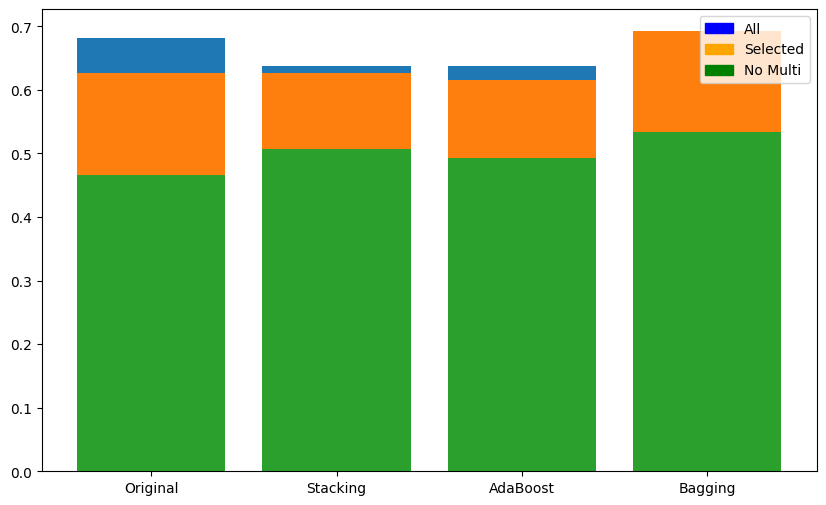

All Features {'Original': 0.6813186813186813, 'Stacking': 0.6373626373626373, 'AdaBoost': 0.6373626373626373, 'Bagging': 0.6703296703296703}
-----------------------------------------------
Selected Features {'Original': 0.6263736263736264, 'Stacking': 0.6263736263736264, 'AdaBoost': 0.6153846153846154, 'Bagging': 0.6923076923076923}
-----------------------------------------------
No Multicollinearity {'Original': 0.4657534246575342, 'Stacking': 0.5068493150684932, 'AdaBoost': 0.4931506849315068, 'Bagging': 0.5342465753424658}
+++++++++++++++++++++++++++++++++++++++++++++++
All Features:
Original:
  Precision: 0.6627144785039522
  Recall: 0.6813186813186813
  F1: 0.663735585681287
Stacking:
  Precision: 0.7481437481437482
  Recall: 0.6373626373626373
  F1: 0.5449503952177749
AdaBoost:
  Precision: 0.6118647458983593
  Recall: 0.6373626373626373
  F1: 0.6124594271192838
Bagging:
  Precision: 0.6468203927220321
  Recall: 0.6703296703296703
  F1: 0.641334482510953

------------------------

In [274]:
data_one, data_two, data_three, metr1, metr2, metr3
fig, ax = plt.subplots(figsize=(10, 6))
types = list(data_one.keys())
values = list(data_one.values())
types1 = list(data_two.keys())
values1 = list(data_two.values())
types2 = list(data_three.keys())
values2 = list(data_three.values())
colors = {'All':'blue', 'Selected':'orange', 'No Multi':'green'}
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.bar(types, values)
plt.bar(types1, values1)
plt.bar(types2, values2)
plt.show()

print('All Features',data_one)
print('-----------------------------------------------')
print('Selected Features',data_two)
print('-----------------------------------------------')
print('No Multicollinearity',data_three)
print('+++++++++++++++++++++++++++++++++++++++++++++++')
print('All Features:')
for line, metrics in metr1.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character
print('-----------------------------------------------')
print('Selected Features:')
for line, metrics in metr2.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character
print('-----------------------------------------------')
print('No Multicollinearity:')
for line, metrics in metr3.items():
    print(line + ":")
    for metric, value in metrics.items():
        print(f"  {metric}: {value}")
    if line == 'Bagging':  # Add a newline after printing metrics for 'Bagging'
        print()  # Print a newline character